<a href="https://colab.research.google.com/github/mdepasquale1023/Python-Practice/blob/main/TwitterSentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [5]:
#read the train.csv file using pandas
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

#backup a copy of the original train.csv
train_original = train.copy()

In [6]:
#read the test.csv file using pandas
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

#backup a copy of the original test.csv
test_original = test.copy()

In [7]:
#combine train.csv and test.csv files
combine = pd.concat([train, test], ignore_index=True, sort=True)

In [8]:
#overview the head
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [9]:
#overview the tail
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [10]:

def remove_pattern(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)

    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)

    return text

In [11]:
combine['Clean_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('thi', '')

In [13]:
#removing punctuation, numbers, and special characters
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]", " ", regex = True)

combine.head(10)

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [14]:
#removing short words
combine['Clean_Tweets'] = combine['Clean_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams about that #school...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [15]:
#tokens are individual terms or words
#tokenization is the process of splitting a string of text into tokens
tokenized_tweet = combine['Clean_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_Tweets, dtype: object

In [16]:
#stemming strips suffixes like ing, ly, es, s, etc
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_Tweets, dtype: object

In [17]:
#stitch the tokens back together with a for statement
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Clean_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [18]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('happi', 'happy')

In [19]:
#generating a WordCloud
!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#generating wordcloud for tweets with label 0
#storing all words which are non-racist/sexist
all_words_positive = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==0])

In [21]:
#combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

#Use ImageColorGenerator library from Wordcloud
#take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#use the WordCloud funcrion from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

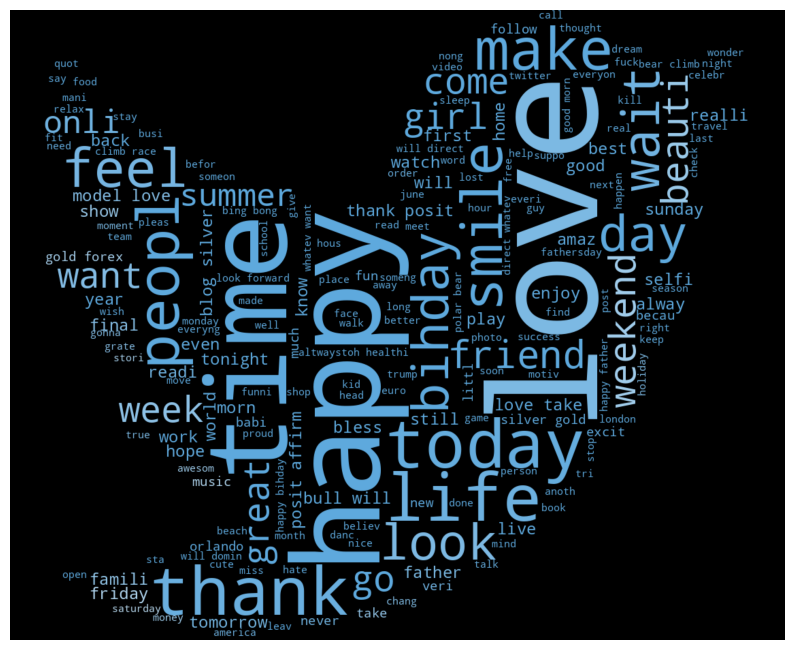

In [22]:
#size of the image generated
plt.figure(figsize=(10,20))

#color the words from the dataset to the image's color
#recolor just recolors the default colors to the image's blue color
#interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [23]:
#storing all other words with the label 1
all_words_negative = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==1])


In [24]:
#combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

#use the ImageColorGenerator library from Wordcloud
#take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

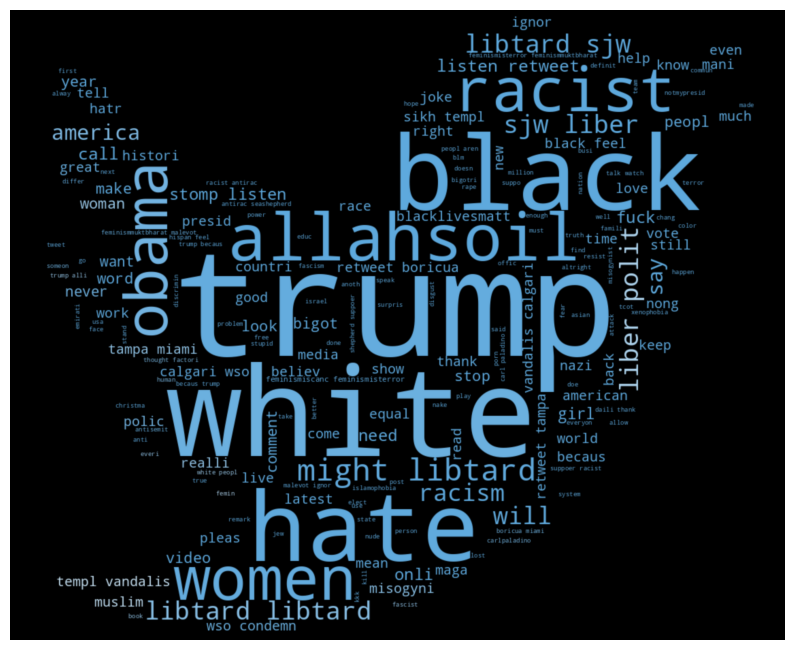

In [25]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [26]:
#cleaning up some words for the plot
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('posit', 'positive')

combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('polit', 'politics')

In [27]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace('healthi', 'healthy')

In [28]:
#for-loop extracting hashtags from tweets
def Hashtags_Extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [29]:
ht_positive = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==0])

In [30]:
#unnest the list
ht_positive_unnest = sum(ht_positive,[])

In [31]:
ht_negative = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==1])

In [32]:
#unnest the list
ht_negative_unnest = sum(ht_negative,[])

In [33]:
#plotting the positive hashtags
#counting the frequency of words that are positive

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'positive': 917, 'smile': 676, 'healthy': 576, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [34]:
#creating a df for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [35]:
df_positive.value_counts()

Hashtags       Count
a              5        1
paus           1        1
pay            98       1
paxex          2        1
pawssum        1        1
                       ..
getlost        1        1
getityourself  1        1
getittogeth    1        1
getitdon       1        1
zydeco         1        1
Length: 19487, dtype: int64

In [36]:
df_positive['Count'].sum()

68401

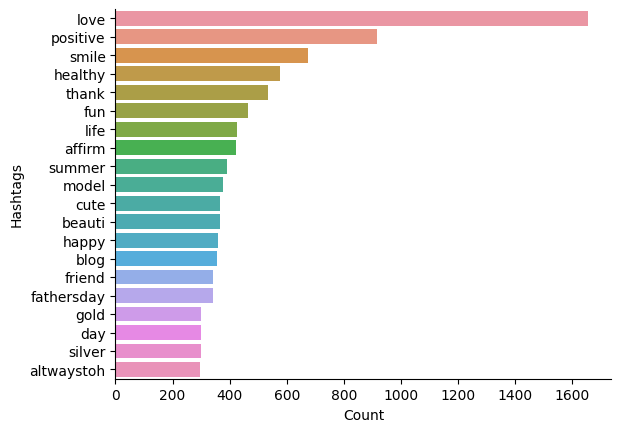

In [37]:
#plotting a bar plot for the 20 most frequent words used for hashtags

df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [38]:
#frequency for negative sentiments
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'politics': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [39]:
#dataframe for the most frequently used words in hashtags

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


In [40]:
df_negative.value_counts()

Hashtags           Count
aand               2        1
poc                1        1
plutocrat          2        1
plettenburgbay     2        1
plannedparenthood  1        1
                           ..
friend             1        1
freethenippl       1        1
freemilo           5        1
freemason          1        1
zuma               1        1
Length: 1719, dtype: int64

In [41]:
df_negative['Count'].sum()

4615

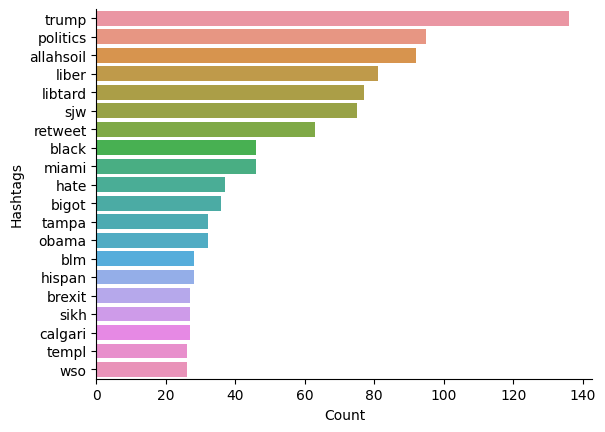

In [42]:
#plotting a barplot for the 20 most frequent words used for hashtags
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Machine Learning

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Clean_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#Term Frequency (TF), Inverse Document Frequency (IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf_matrix = tfidf.fit_transform(combine['Clean_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#using the features from bag-of-words for training set
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [46]:
#using features from TD-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

#Bag-of-Words features
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3, random_state = 2)

In [48]:
#TF-IDF features
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [49]:
#supervised machine learning
#importing f1_score from sklearn

from sklearn.metrics import f1_score

In [50]:
#logistic regression
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [51]:
#fitting the Logistic Regression Model with Bag-of-Words features
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [52]:
#predicting the probabilities
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.85759513e-01, 1.42404869e-02],
       [9.99606197e-01, 3.93803215e-04],
       [9.12593308e-01, 8.74066919e-02],
       ...,
       [8.96796891e-01, 1.03203109e-01],
       [9.59349597e-01, 4.06504027e-02],
       [9.68191616e-01, 3.18083839e-02]])

In [53]:
#calculating the F1 score

#if the prediction is greater than or equal to 0.3 than 1 else 0
#Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

#converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

#calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5742574257425742

In [54]:
#fitting the Logistic Regression Model with TF-IDF features
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [55]:
#predicting possibilities
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98444613, 0.01555387],
       [0.97886824, 0.02113176],
       [0.94135281, 0.05864719],
       ...,
       [0.98626215, 0.01373785],
       [0.96798702, 0.03201298],
       [0.99037426, 0.00962574]])

In [56]:
#Calculating the F1 score

#if the prediction is greater than or equal to 0.3 than 1 else 0
#Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

#calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5870129870129871

In [57]:
#using XGBoost
!pip install xgboost
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#Bag-of-Words features
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [59]:
#fitting the XGBoost Model
model_bow.fit(x_train_bow,y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [60]:
#predicting the probabilities
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9205685e-01, 7.9431366e-03],
       [9.9923664e-01, 7.6334609e-04],
       [9.2813241e-01, 7.1867600e-02],
       ...,
       [9.2938465e-01, 7.0615344e-02],
       [9.2813241e-01, 7.1867600e-02],
       [9.2813241e-01, 7.1867600e-02]], dtype=float32)

In [61]:
#Calculating the F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets

xgb=xgb[:,1]>=0.3

#converting the results to integer type
xgb_int=xgb.astype(np.int)

#calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5763779527559055

In [62]:
#with TF-IDF features
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [63]:
#fitting the XGBoost model
model_tfidf.fit(x_train_tfidf,y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=29, ...)

In [64]:
#predicting the probabilities
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9964996 , 0.00350042],
       [0.9872037 , 0.01279626],
       [0.9535694 , 0.04643058],
       ...,
       [0.9870963 , 0.01290371],
       [0.9874027 , 0.01259733],
       [0.996321  , 0.00367897]], dtype=float32)

In [65]:
#calculating the F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

#converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

#calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score


0.573024740622506

In [66]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [67]:
#fitting the Decision Tree model with Bag-of-Words features
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [68]:
#predicting the probabilities
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [69]:
#calculating the F1 score
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

#converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

#calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.5204274041483344

In [70]:
#fitting the Decision Tree model with TF-IDF features
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [71]:
#predicting probabilities
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [72]:
#calculating the F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5454545454545455

# Model Comparison

In [73]:
#Bag-of-Words
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T


,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.574257,0.576378,0.520427


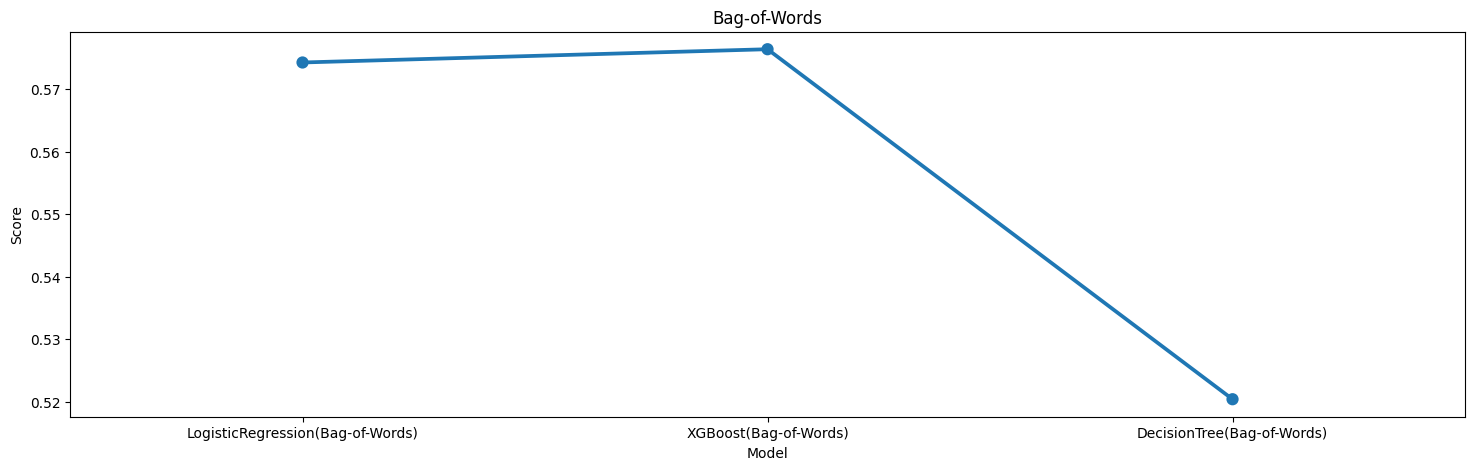

In [74]:
#comparison graph
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

In [75]:
#TF-IDF
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.587013,0.573025,0.545455


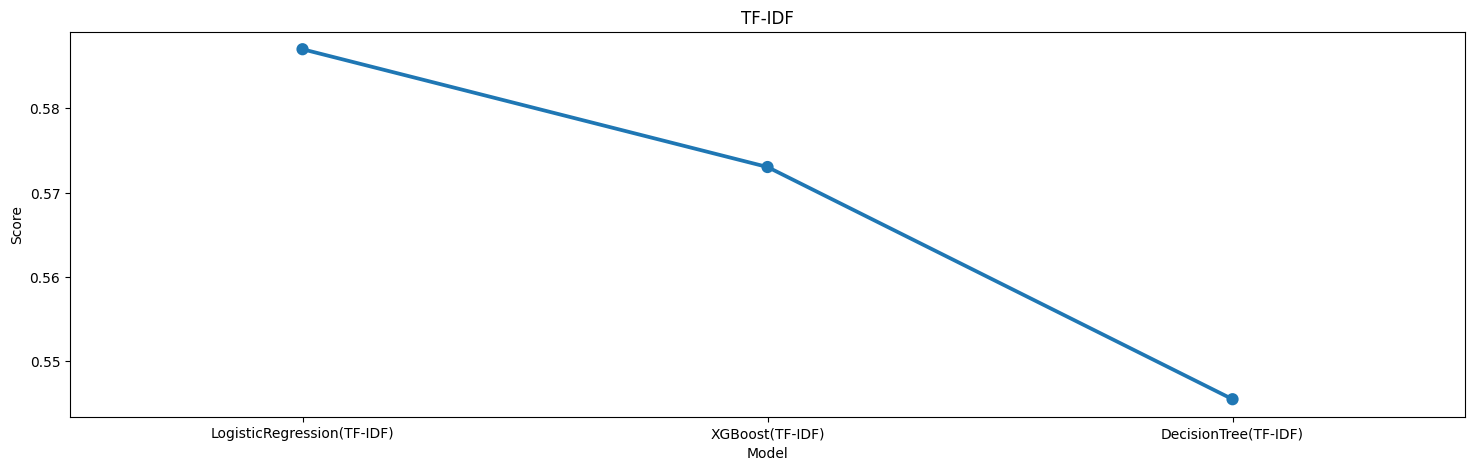

In [76]:
#comparison graph

plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

In [77]:
#comparing the score of the Logic Regression model with both
#the feature extraction techniques that is Bag-of-Words and TF-IDF

Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.574257,0.587013


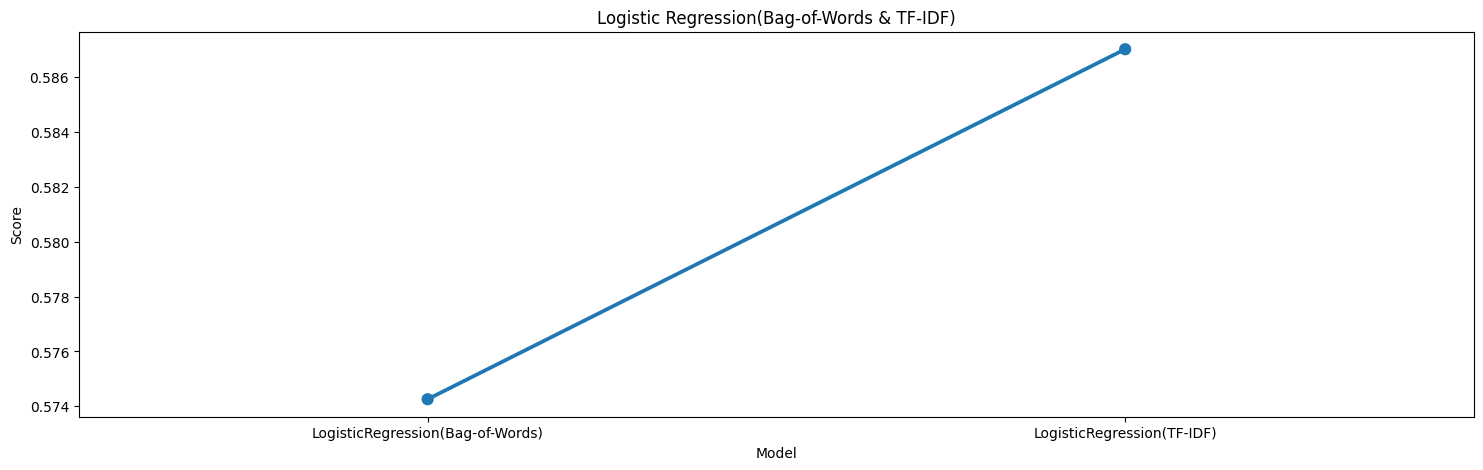

In [78]:

plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

In [79]:
#predicting the results for the test data

test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [80]:
res = pd.read_csv('result.csv')
res.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [81]:
res.tail()

,id,label
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
17196,49159,0


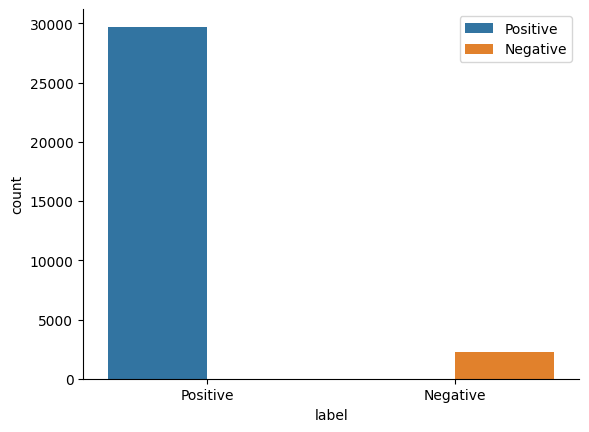

In [85]:
#plotting results
sns.countplot(data=train_original, x='label', hue='label')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.legend(labels=['Positive', 'Negative'])
sns.despine()

In [83]:
value_counts = train_original['label'].value_counts()

value_counts

0    29720
1     2242
Name: label, dtype: int64

In [84]:
n = 29720
p = 2242

percent = ((n/p)-1)*100
rounded_percent = round(percent,3)

print(rounded_percent,'%')

1225.602 %


# It is 1225.602% more likely for a tweet to be positive without any racist or sexist content than negative with racist or sexist content